# Task 3: Data Visualization

This notebook covers **data visualization** for the Weather Dataset using Python libraries like Pandas, Matplotlib, and Seaborn.

## Step 1: Install and Import Libraries

In [12]:

%pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


## Step 2: Load the Dataset

In [13]:

# Replace with your dataset path if needed
df = pd.read_csv('Project 1 - Weather Dataset.csv')
df.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Visualization 1: Temperature Distribution

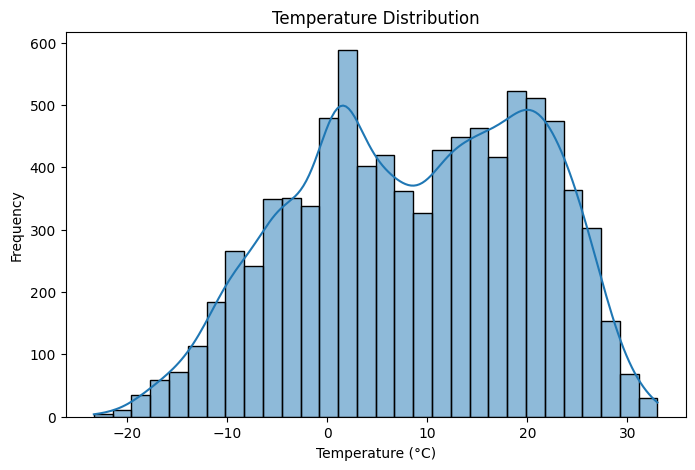

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names: remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Use the lowercase column name for Temperature
plt.figure(figsize=(8,5))
sns.histplot(df['temp_c'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


## Visualization 2: Humidity Distribution

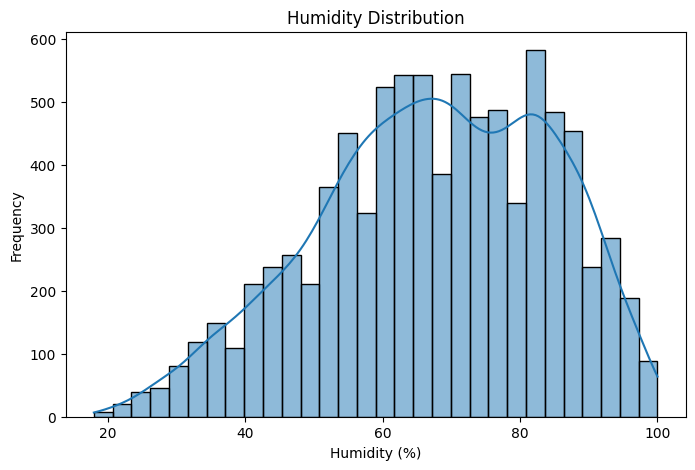

In [15]:

plt.figure(figsize=(8,5))
sns.histplot(df['rel hum_%'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()


## Visualization 3: Temperature vs Humidity

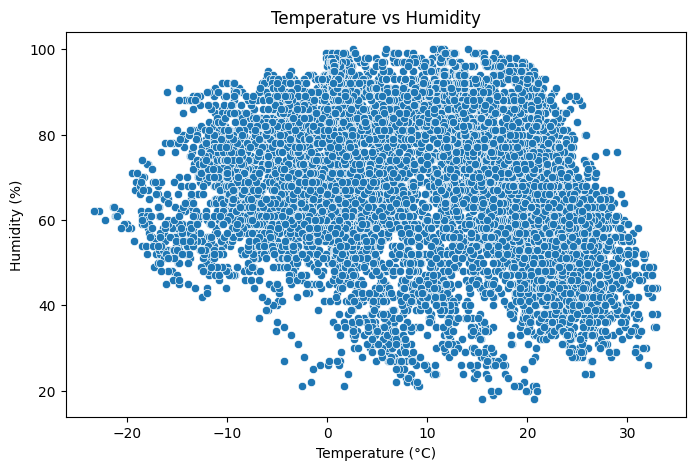

In [18]:
# Use the correct column names for temperature and humidity
required_cols = ['temp_c', 'rel hum_%']

# Drop rows with missing values
df = df.dropna(subset=required_cols)

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp_c', y='rel hum_%', data=df)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()


## Visualization 4: Temperature vs Wind Speed

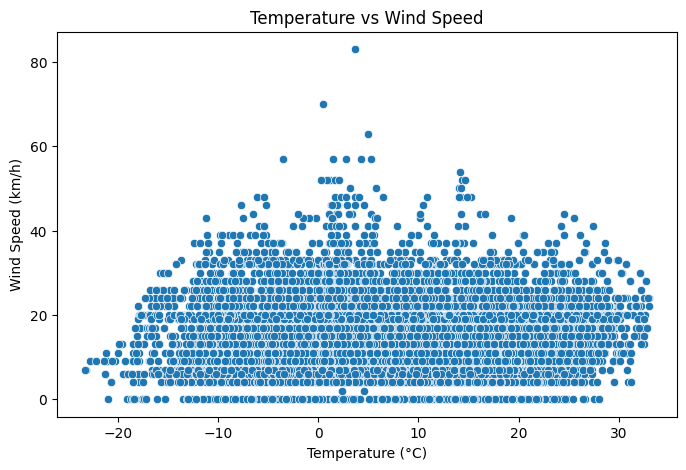

In [20]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='temp_c', y='wind speed_km/h', data=df)
plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (km/h)')
plt.show()


## Visualization 5: Correlation Heatmap

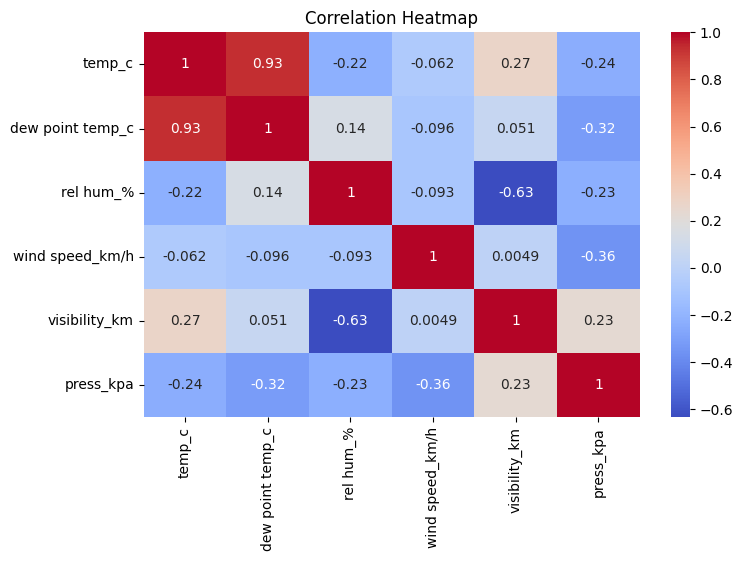

In [22]:

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Visualization 6: Boxplot for Temperature

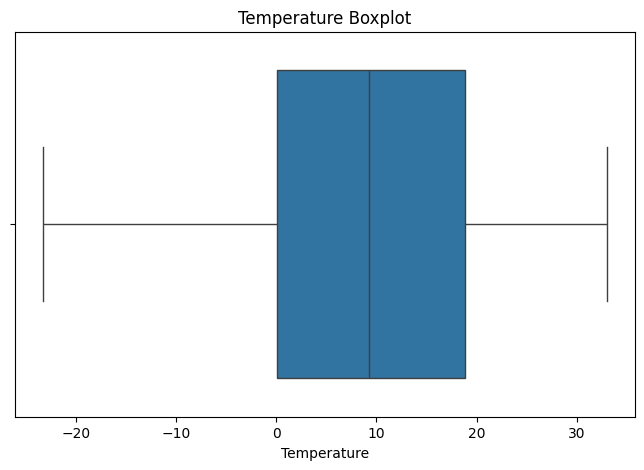

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Standardize column names: remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Automatically detect the temperature column
temp_cols = [col for col in df.columns if 'temp' in col]
if not temp_cols:
    raise ValueError("No temperature column found in the DataFrame.")
temp_col = temp_cols[0]  # use the first match

# Drop rows with missing temperature values
df = df.dropna(subset=[temp_col])

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[temp_col])
plt.title('Temperature Boxplot')
plt.xlabel('Temperature')
plt.show()


## Visualization 7: Temperature Over Time

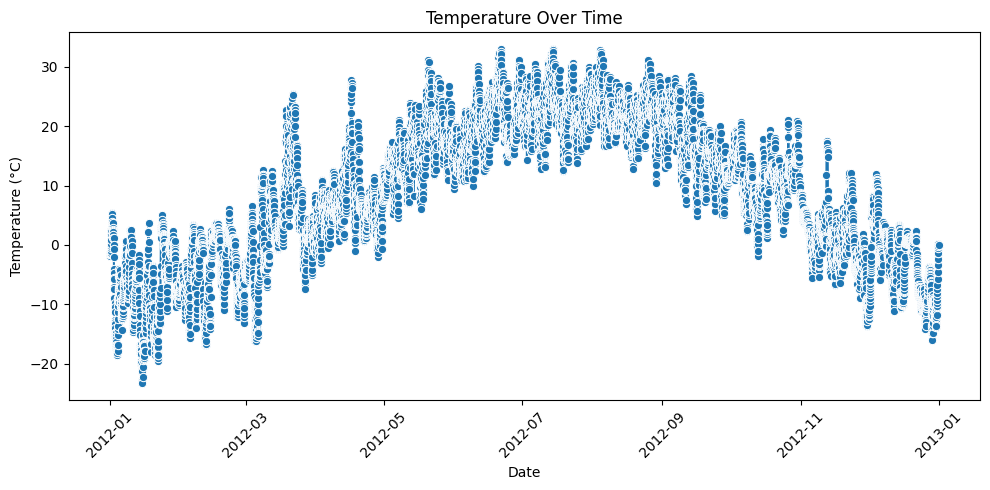

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Ensure the temperature column exists
temp_cols = [col for col in df.columns if 'temp' in col]
if not temp_cols:
    raise ValueError("No temperature column found in the DataFrame.")
temp_col = temp_cols[0]

# Ensure the date column exists
date_cols = [col for col in df.columns if 'date' in col]
if not date_cols:
    raise ValueError("No date column found in the DataFrame.")
date_col = date_cols[0]

# Drop missing values
df = df.dropna(subset=[temp_col, date_col])

# Optional: Convert date column to datetime if needed
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Group temperatures into bins
bins = [0, 10, 20, 30, 40, 50]  # adjust based on your dataset
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
df['temp_range'] = pd.cut(df[temp_col], bins=bins, labels=labels)

# Count how many entries fall into each temperature range
counts = df['temp_range'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Temperature Distribution Over Time')
plt.show()
